# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy import signal
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from statsmodels.graphics.tsaplots import plot_pacf

In [125]:
df = pd.read_csv('playground-series-s3e20/train.csv')

In [3]:
df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


# PCA
This dataset consists of 497 timeseries, with one timeseries per location. We can perform PCA on the timeseries to reduce the number of timeseries we need to forecast

In [21]:
test = df.pivot(index = ['year','week_no'], 
                    columns = ['latitude', 'longitude'], 
                    values = 'emission')

In [22]:
test.head()

latitude        -0.510    -0.528    -0.547      -0.569    -0.598    -0.604  \
longitude       29.290    29.472    29.653      30.031    29.102    29.896   
year week_no                                                                 
2019 0        3.750994  3.857115  0.500023  100.382980  0.076542  64.49460   
     1        4.025176  4.213432  0.529315  106.375980  0.081001  68.42294   
     2        4.231381  4.451489  0.554183  110.766335  0.084788  71.01155   
     3        4.305286  4.553981  0.561553  113.097940  0.085920  72.57178   
     4        4.347317  4.676066  0.559731  114.985886  0.085650  73.83461   

latitude         -0.615      -0.627     -0.637     -0.653  ...    -3.095  \
longitude        30.885      29.773     30.763     30.447  ...    29.505   
year week_no                                               ...             
2019 0        76.600110  101.643295  40.153328  28.108765  ...  5.375411   
     1        82.630714  109.828674  41.531597  29.032100  ...  5.420106   
     2        86.668290  115.189064  42.774483  29.870031  ...  5.327792   
     3        88.741880  117.846870  43.542730  30.415354  ...  5.422680   
     4        91.137010  120.702270  43.739470  30.567698  ...  5.316918   

latitude        -3.099      -3.133     -3.136     -3.138     -3.153    -3.161  \
longitude       29.601      29.467     30.364     30.662     30.347    28.839   
year week_no                                                                    
2019 0        69.82686  105.982190  14.774838  23.184301  15.069341  0.106631   
     1        74.35756  113.068474  15.337234  24.404161  16.217907  0.112878   
     2        77.72222  118.279810  15.730142  25.097378  16.811665  0.118181   
     3        79.23992  120.618580  15.979696  25.591475  17.231894  0.119753   
     4        80.32427  122.382960  15.905249  25.756530  17.642060  0.119364   

latitude         -3.174     -3.287     -3.299  
longitude        29.926     29.713     30.301  
year week_no                                   
2019 0        41.193130  39.696404  26.111166  
     1        43.877285  43.529408  28.045977  
     2        45.760826  45.993286  29.293518  
     3        46.675327  47.163128  29.950650  
     4        47.317184  48.742470  30.572742  

[5 rows x 497 columns]

In [23]:
pca = PCA(n_components=10)
pca.fit(test)
dfpca = pca.transform(test)

Text(0, 0.5, 'Cumulative Explained Variance')

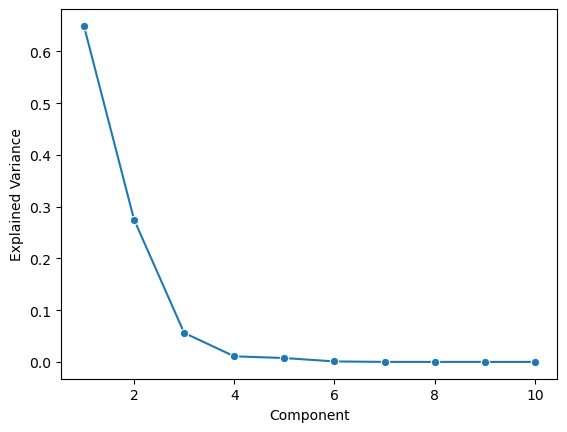

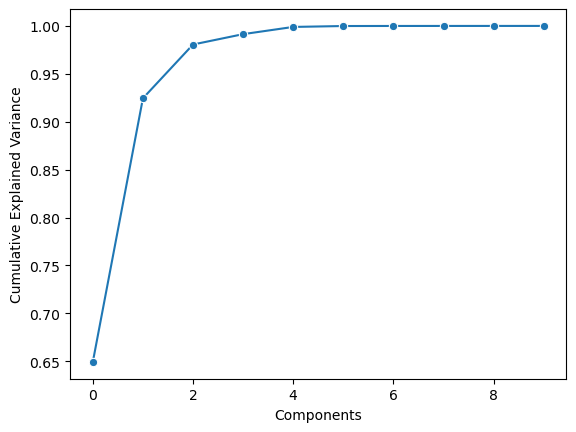

In [24]:
ax = sns.lineplot(x = np.arange(1, len(pca.explained_variance_ratio_)+1), 
             y = pca.explained_variance_ratio_, 
             marker='o')
ax.set_xlabel('Component')
ax.set_ylabel('Explained Variance')

plt.figure()
ax = sns.lineplot(x = np.arange(0, len(pca.explained_variance_ratio_)), 
             y = np.cumsum(pca.explained_variance_ratio_), 
             marker='o')
ax.set_xlabel('Components')
ax.set_ylabel('Cumulative Explained Variance')

The above plots suggest that 2 components can explain 92% of the variance, and 3 components explain 98% of the variance in the timeseries, and 5 components explain 99.8 percent of the variance. Thus, the timeseries are highly correlated, and we only need to analyze 3-5 timeseries components. 

In [25]:
dfpca = pd.DataFrame(dfpca, columns = ['ts '+str(i) for i in range(10)])
dfpca.head()

,ts 0,ts 1,ts 2,ts 3,ts 4,ts 5,ts 6,ts 7,ts 8,ts 9
0,1579.901004,-165.215375,212.633864,131.779458,82.251463,-11.771136,8.332433,0.122090,0.441074,2.626585
1,1745.315462,-5.430768,60.114016,82.245162,43.249278,-5.606973,-4.659071,2.463270,2.466544,2.532008
2,1881.181782,100.812227,-46.207166,24.830942,23.817648,-1.587840,-8.948936,3.264535,3.903450,2.544842
3,1921.800079,153.848545,-90.330150,20.721975,14.168593,3.452747,-9.762655,3.358161,3.941225,2.583824
4,1918.990633,193.784085,-126.290328,34.467612,-37.704049,8.140463,-13.192799,1.811543,3.637781,2.993408


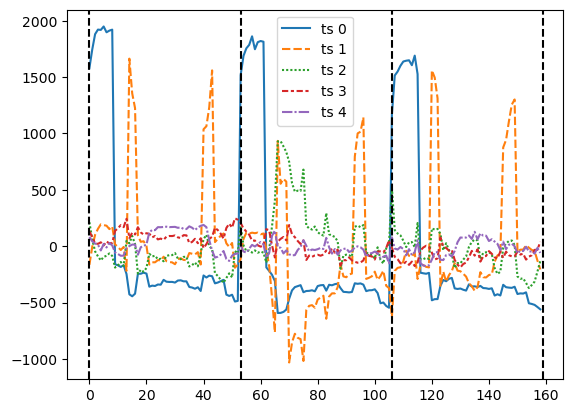

In [26]:
palette = sns.color_palette("tab10")
num_components = 5
#for column in dfpca.columns:
#    ax = sns.lineplot(data = dfpca.loc[:, column])
ax = sns.lineplot(dfpca.loc[:,dfpca.columns[:num_components]])
plt.legend()    

ax.axvline(x=0, color = 'k', linestyle = '--')
ax.axvline(x=53, color = 'k', linestyle = '--')
ax.axvline(x=106, color = 'k', linestyle = '--')
ax.axvline(x=159, color = 'k', linestyle = '--')

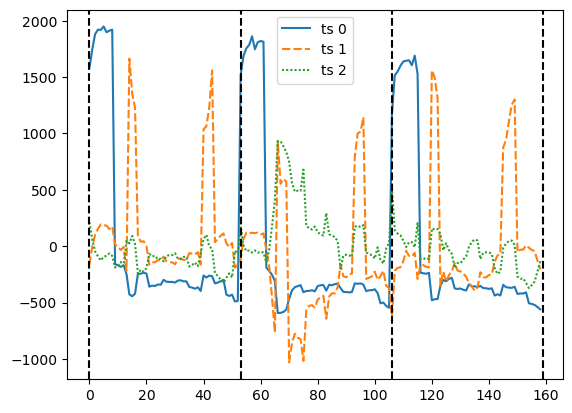

In [27]:
palette = sns.color_palette("tab10")
num_components = 3
ax = sns.lineplot(dfpca.loc[:,dfpca.columns[:num_components]])
plt.legend()    

ax.axvline(x=0, color = 'k', linestyle = '--')
ax.axvline(x=53, color = 'k', linestyle = '--')
ax.axvline(x=106, color = 'k', linestyle = '--')
ax.axvline(x=159, color = 'k', linestyle = '--')

These components account for 98% of the variability in all the time series. The two most important components clearly exhibit yearly seasonality. The most important component displays a slight downward trend, while the second componenet exhibits a dip. Finally the third most important component spikes in 2020, and can be seen as the 'Covid' component. 

Note that the first component looks quite similar to one of the 497 timeseries we are trying to forecast. Below, we check that this is indeed the case. Below notice that the largest loading in the first component is many orders of magnitude larger than the following largest loadings. 

In [31]:
ts1_maxloading_loc = test.columns[np.where(pca.components_ == np.max(pca.components_[0]))[1][0]]
ts1_maxloading_loc

(-2.079, 29.321)

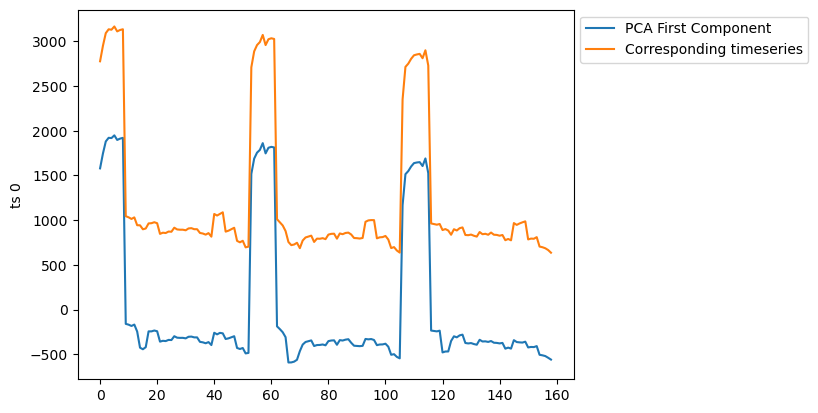

In [32]:
sns.lineplot(dfpca['ts 0'], label = 'PCA First Component')
sns.lineplot(x = range(test.shape[0]), y = test[ts1_maxloading_loc], label = 'Corresponding timeseries')
plt.legend(bbox_to_anchor=(1,1))

The above plot shows that the most important component is largely composed of a shifted version of the emission timeseries of the location with latitude = -2.079 and longitude 29.321. 
One approach is to check if this holds true for other components. In that case, we can directly forecast a few of the original timeseries, and do a inverse transform to obtain other timeseries. However, directly forecasting existing timeseries would involve dealing with the fact that the 1st componenet is actually a shift of a timeseries. To avoid this difficulty, we simply forecast the PCA componenets instead of original timeseries with high similarity(?) to the componenets. 

# Analyzing seasonality
We analyze the periodograms of the 3 most important components, to analyze the frequency of the fourier features to include when forecasting each one of them. 

In [33]:
num_components = 3;
pca = PCA(n_components = num_components)
pca.fit(test)
dfpca = pca.transform(test)
dfpca = pd.DataFrame(dfpca, columns = ['ts '+str(i+1) for i in range(num_components)])

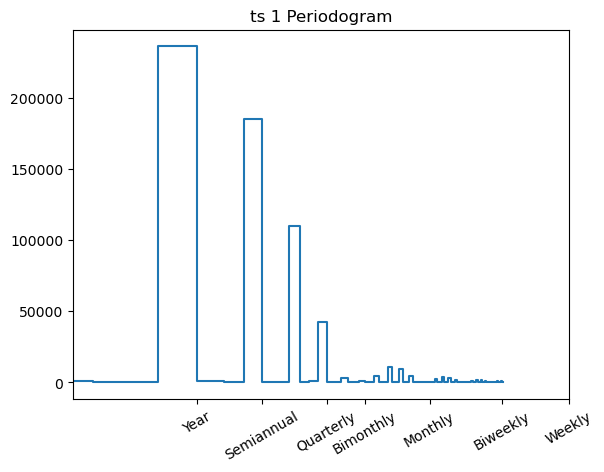

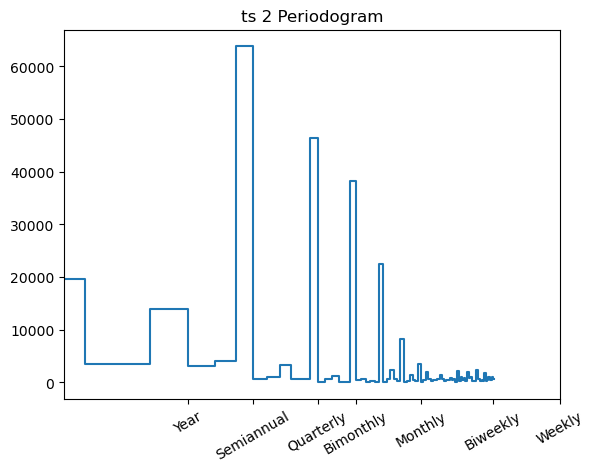

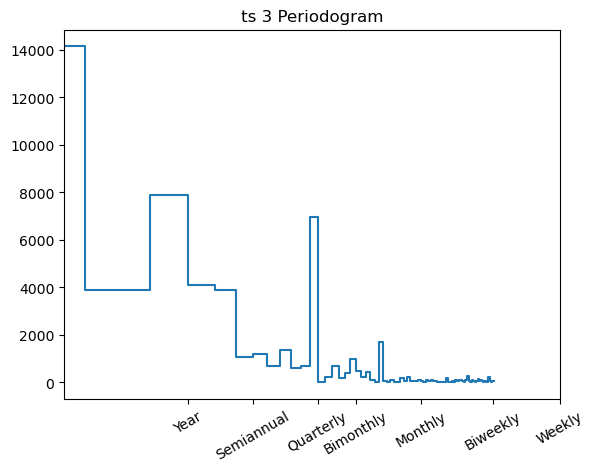

In [34]:
fs = 53
for column in dfpca.columns:
    plt.figure()
    f, psd = signal.periodogram(dfpca[column], fs, scaling='spectrum') 
    ax = sns.lineplot(x=f, y=psd, drawstyle='steps-pre')
    ax.set_title(column + ' Periodogram')
    ax.set_xscale('log')
    ax.set_xticks([1, 2, 4, 6, 12, 26, 53])
    ax.set_xticklabels(['Year', 'Semiannual', 'Quarterly', 'Bimonthly', 'Monthly', 'Biweekly', 'Weekly'], 
                       rotation=30)
    plt.minorticks_off()

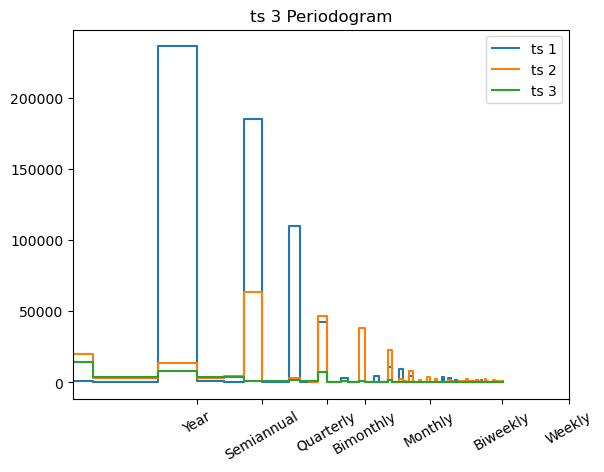

In [35]:
fs = 53
_, ax = plt.subplots()
for column in dfpca.columns:
    f, psd = signal.periodogram(dfpca[column], fs, scaling='spectrum') 
    sns.lineplot(x=f, y=psd, drawstyle='steps-pre', label=column)
ax.set_title(column + ' Periodogram')
ax.set_xscale('log')
ax.set_xticks([1, 2, 4, 6, 12, 26, 53])
ax.set_xticklabels(['Year', 'Semiannual', 'Quarterly', 'Bimonthly', 'Monthly', 'Biweekly', 'Weekly'], 
                   rotation=30)
plt.minorticks_off()
plt.legend()

The first component exhibits yearly seasonality and semiannual seasonality, while the second componenet exhibits seminannual, quarterly and bimonthly seasonality. The third componenet exhibits some yearly seasonality and quarterly seasonality, but is largely dominated by very low frequencies suggesting it is largely aperiodic. 
Notice that:
- Yearly seasonality is present in the dominating timeseries component
- Semiannual seasonality is present in the top 2 timeseries components 
- The third timeseries componenet exhibits very little seasonality and can be viewed as a 'covid' curve.
Thus we can make use of yearly and semiannual seasonal features in our model when forecasting. 

# Modelling Seasonality
We first model the seasonality with a linear regression on input features (time dummy and fourier features)

In [37]:
# Deprecated: use statsmodels instead
def fourier_features (time_dummy, time_dummy_frequency, fourier_feature_frequencies):
    time = np.arange(len(time_dummy), dtype=np.float32)
    list_of_features = {}
    for frequency in fourier_feature_frequencies:
        target_freq = frequency/time_dummy_frequency
        theta = time*2*np.pi*target_freq
        list_of_features.update({f"sin_{frequency}":np.sin(theta), f"cos_{frequency}":np.cos(theta)})
                                
    return pd.DataFrame(list_of_features, index=time_dummy)    

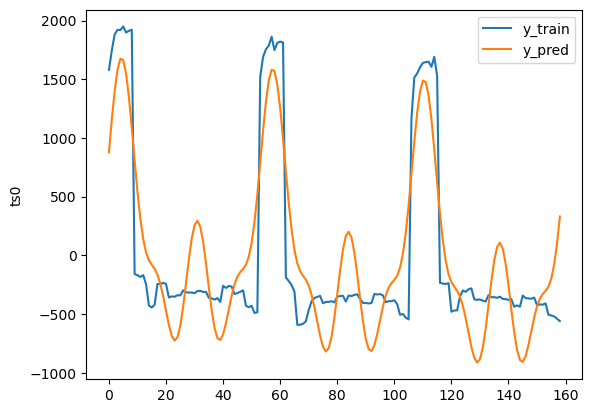

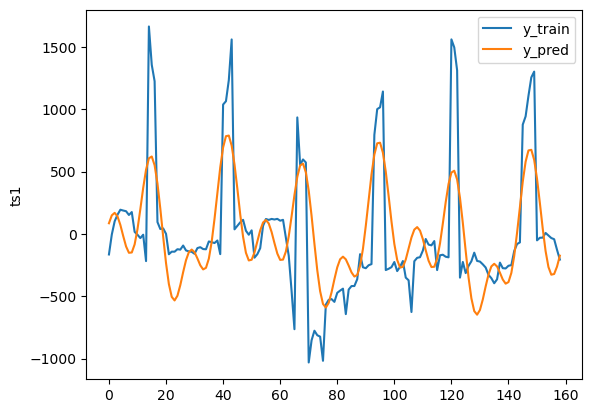

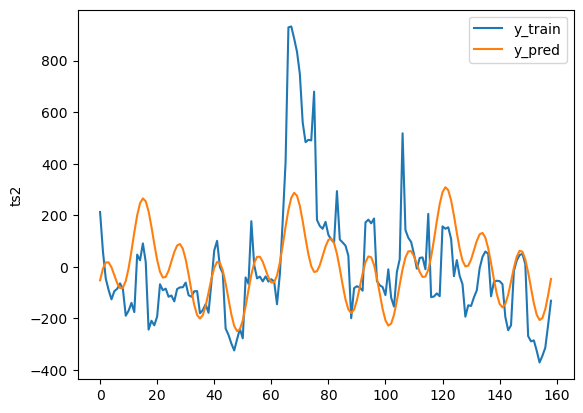

In [38]:
num_weeks_in_year = 53
feature_frequencies = [1,2,4]

pca_components = 3
pca = PCA(n_components=pca_components)
pca.fit(test)
dfpca = pca.transform(test)
dfpca = pd.DataFrame(dfpca, columns = ['ts'+str(i) for i in range(pca_components)])

X_train = pd.DataFrame({'time_dummy':range(dfpca.shape[0])})
X_train = fourier_features(range(dfpca.shape[0]), num_weeks_in_year, feature_frequencies)
X_train['time_dummy'] = X_train.index
y_train = dfpca.loc[:,:].copy()

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = pd.DataFrame(lr.predict(X_train), columns=y_train.columns)

for column in dfpca.columns:
    plt.figure()
    sns.lineplot(y_train[column], label='y_train')
    sns.lineplot(y_train_pred[column], label='y_pred')

Clearly, forecasting with only seasonal components will lead to poor estimates. This error will propogate to the inverse transform step, which can lead to further errors. Thus, we need to model serial dependence as well

# Modelling Serial Trends
We now plot the partial autocorrelation(correlogram) of the residuals to find which lag features are necessary for each timeseries. We then introduce those features to model the residual

In [39]:
y_residual = y_train - y_train_pred

<Figure size 640x480 with 0 Axes>

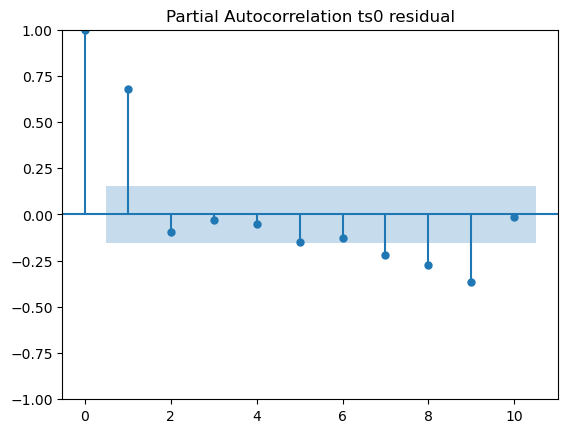

<Figure size 640x480 with 0 Axes>

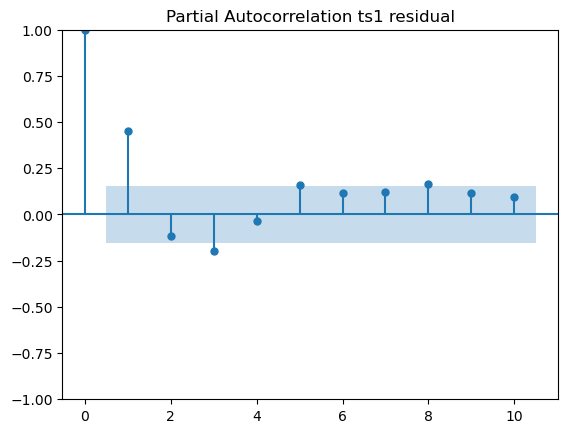

<Figure size 640x480 with 0 Axes>

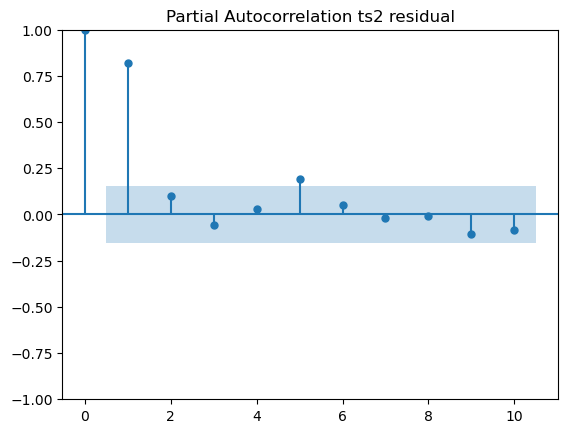

In [40]:
for column in y_residual.columns:
    plt.figure()
    plot_pacf(y_residual[column], lags = 10,
              title='Partial Autocorrelation ' + column + ' residual')  

Notice that all the timeseries have large autocorrelations with lags of 1. Interestingly, the first component has high partial autocorrelation with a lag of 9. 

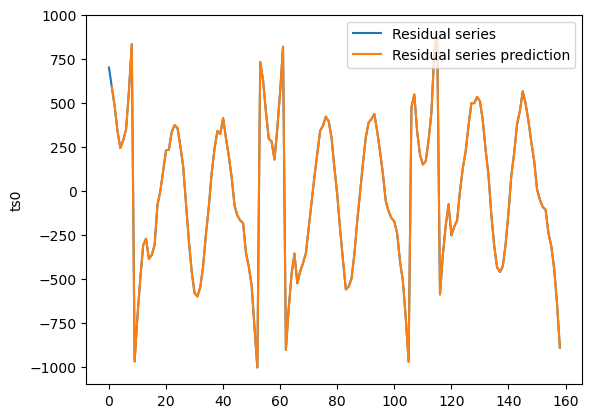

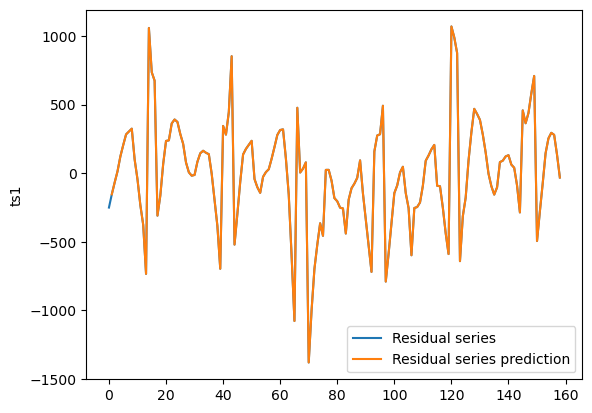

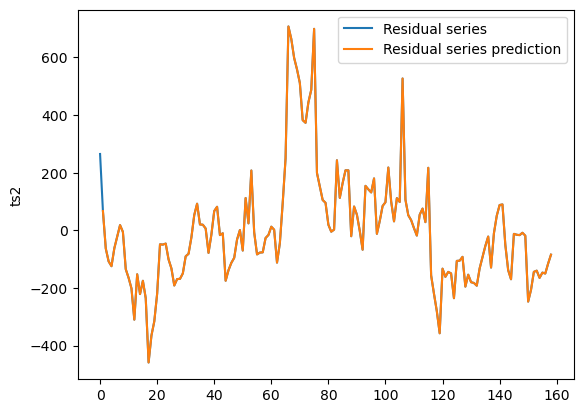

In [57]:
lag_shifts = [i for i in range(2)]
residual_regressions = []
residual_datasets = []
residual_predictions = []
for residual_ts in y_residual.columns: 
    residual_train = pd.DataFrame({f'shift_{i}':y_residual[residual_ts].shift(i) for i in lag_shifts})   
    residual_train[residual_ts] = y_residual[residual_ts] 
    residual_datasets.append(residual_train)
    
    residual_train = residual_train.dropna()
    lr_residual = LinearRegression()
    lr_residual.fit(residual_train.loc[:, residual_train.columns != residual_ts],
                    residual_train[residual_ts])
    residual_regressions.append(lr_residual)
        
    residual_pred = lr_residual.predict(residual_train.loc[:, residual_train.columns != residual_ts])
    residual_pred = pd.DataFrame({residual_ts: residual_pred}, index=residual_train.index)
    residual_predictions.append(residual_pred)

    plt.figure()
    sns.lineplot(y_residual[residual_ts], label='Residual series')
    sns.lineplot(residual_pred[residual_ts], label='Residual series prediction')

It seems that a lag of 1 is sufficient for an accurate residual estimate. However, the above model can only forecast 1 week, while our tsk requires forecasting 52 weeks (1 year). We require one lag feature to properly model the component timeseries. 

# Modelling and Forecasting 1 year
We now understand the seasonality and lag components required to model the timeseries. We use a multioutput approach and will forecast using a linear regression. This is because we have little validation data, and many hyperparameters (such as no of PCA componenets) to optimize over. As a result, it is preferable to avoid propogation of errors present in recursive and diRec forecasting strategies. Moreover we also forego using a direct strategy since we have a large forecast horizon, and forecasting each point in the horizon using a different model is infeasible. 

Below are the details of our model
- Our forecast horizon is 53 weeks, so our linear regression has 53 outputs
- Our inputs include seasonal features and at least 1 lag feature

In [3]:
from forecasting.fourier_features import fourier_features
from forecasting.prepare_forecast_dataset import prepare_forecast_dataset

In [4]:
dfts = df.pivot(index = ['year','week_no'], 
                    columns = ['latitude', 'longitude'], 
                    values = 'emission')

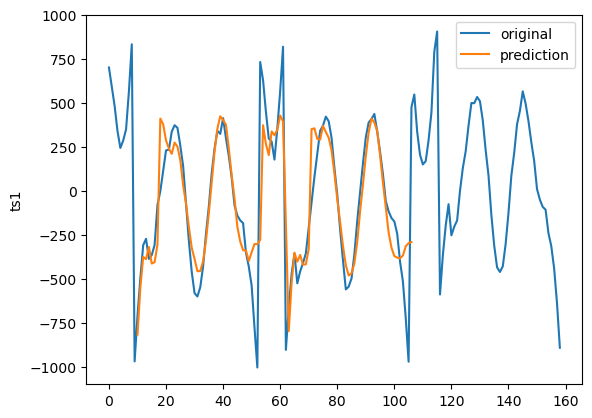

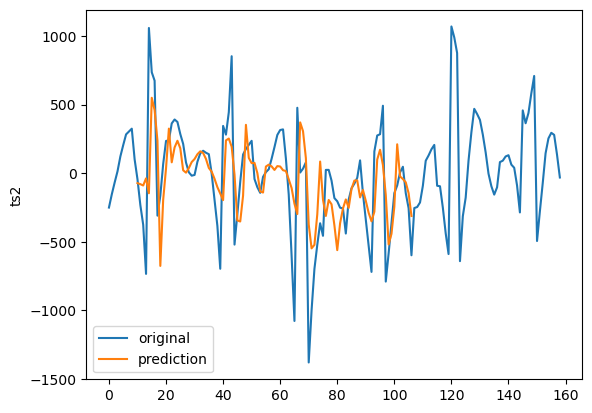

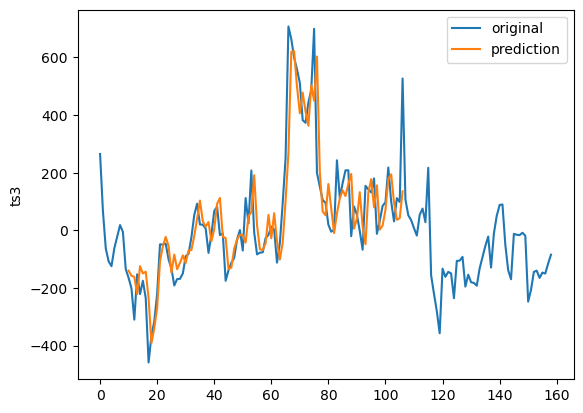

In [26]:
num_pca_components = 3;
forecast_horizon = 53;
nlag_features = 10

sampling_frequency = 53
fourier_feature_frequencies = [1,2,4]

pca = PCA(n_components = num_pca_components)
pca.fit(dfts)
dfpca = pca.transform(dfts)
dfpca = pd.DataFrame(dfpca, columns = ['ts'+str(i+1) for i in range(num_pca_components)])

x_train_seasonal = fourier_features(time_dummy=dfpca.index,
                                    fourier_feature_frequencies=fourier_feature_frequencies,
                                    time_dummy_frequency=sampling_frequency)
x_train_seasonal['time_dummy'] = x_train_seasonal.index
y_train_seasonal = dfpca.loc[:,:].copy()
lr_seasonal = LinearRegression()
lr_seasonal.fit(x_train_seasonal, y_train_seasonal)

y_pred_seasonal = pd.DataFrame(lr_seasonal.predict(x_train_seasonal), columns=y_train_seasonal.columns)
df_residual = y_train_seasonal - y_pred_seasonal

lr_residuals = []
x_pred_residual = []
for residual_ts in df_residual.columns:
    x_train_residual, y_train_residual = prepare_forecast_dataset(df_residual[residual_ts], 
                                                                  forecast_horizon, 
                                                                  nlag_features)
    x_pred_residual.append(x_train_residual)
    
    null_indices =  pd.concat([x_train_residual, y_train_residual], axis=1).isna().any(axis=1)
    valid_indices = null_indices[null_indices == False].index
    x_train_residual = x_train_residual.loc[valid_indices, :]
    y_train_residual = y_train_residual.loc[valid_indices, :]
    
    lr = LinearRegression()
    lr.fit(x_train_residual, y_train_residual)
    lr_residuals.append(lr)

    plt.figure()
    y_pred_residual = pd.DataFrame(lr.predict(x_train_residual),
                                   columns=y_train_residual.columns, index=x_train_residual.index)
    sns.lineplot(df_residual[residual_ts], label = 'original')
    sns.lineplot(y_pred_residual['step_0'], label = 'prediction')

In [27]:
time_dummy_forecast = np.arange(dfpca.index[-1]+1,dfpca.index[-1]+1 + 53)
x_forecast_seasonal = fourier_features(time_dummy_forecast,
                                   fourier_feature_frequencies,
                                   sampling_frequency)
x_forecast_seasonal['time_dummy'] = x_forecast_seasonal.index

y_forecast_seasonal = pd.DataFrame(lr_seasonal.predict(x_forecast_seasonal),
                                   columns=y_train_seasonal.columns,
                                   index=x_forecast_seasonal.index)

In [23]:
y_forecast_residual = pd.DataFrame({df_residual.columns[i]:
              np.transpose(lr_residuals[i].predict(x_pred_residual[i].tail(1))).reshape(-1) 
              for i in range(df_residual.shape[1])}, index=time_dummy_forecast)

In [103]:
y_forecast = y_forecast_seasonal + y_forecast_residual

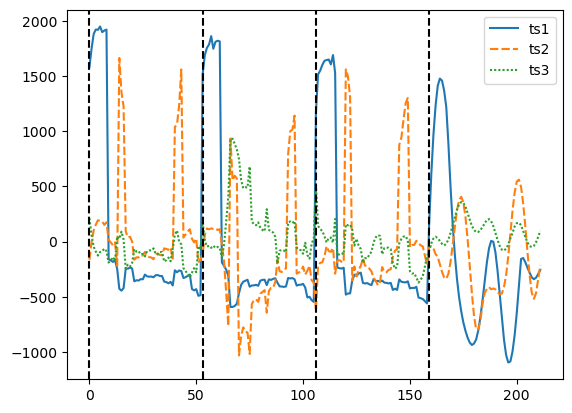

In [104]:
df_pca_forecast = pd.concat([dfpca, y_forecast]) 
ax = sns.lineplot(df_pca_forecast)
plt.legend()    

ax.axvline(x=0, color = 'k', linestyle = '--')
ax.axvline(x=53, color = 'k', linestyle = '--')
ax.axvline(x=106, color = 'k', linestyle = '--')
ax.axvline(x=159, color = 'k', linestyle = '--')

In [117]:
df_forecasts = pca.inverse_transform(y_forecast)
df_forecasts = pd.DataFrame(df_forecasts, columns=dfts.columns, index=y_forecast.index)
df_forecasts['year'] = 2022
df_forecasts['week_no'] = range(0,y_forecast.shape[0])
df_forecasts=  df_forecasts.set_index(['year', 'week_no'])
dfts_forecasts = pd.concat([dfts, df_forecasts])

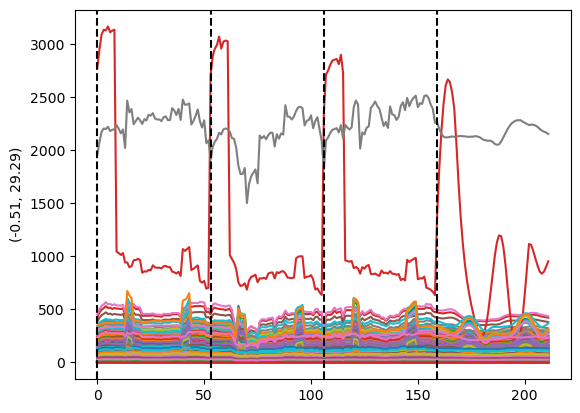

In [122]:
for column in dfts_forecasts.columns:
    sns.lineplot(x = np.arange(0,dfts_forecasts.shape[0]), y=dfts_forecasts[column])

ax = plt.gca()
ax.axvline(x=0, color = 'k', linestyle = '--')
ax.axvline(x=53, color = 'k', linestyle = '--')
ax.axvline(x=106, color = 'k', linestyle = '--')
ax.axvline(x=159, color = 'k', linestyle = '--')

Shown above is a plot of all the timeseries including the forecasts. It seems the current model does an acceptable job of predicting the time series with low average emissions. However, for the two locations with distinctly high emissions, the model does not forecast well. One options is to use other ML models (such as decision trees/ randomforest using XGboost) to model the serial dependence in the residuals, and create a 'hybrid model'.  

In [49]:
#    plt.figure()
 #   y_pred_residual = pd.DataFrame(lr.predict(x_train_residual),
 #                                  columns=y_train_residual.columns)
 #   sns.lineplot(df_residual[residual_ts], label = 'original')
 #   sns.lineplot(y_pred_residual['step_0'], label = 'prediction')

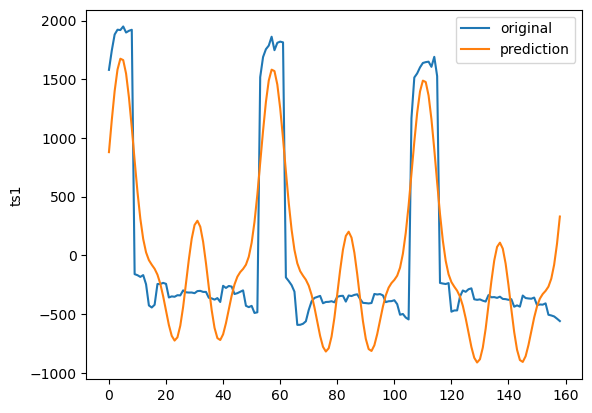

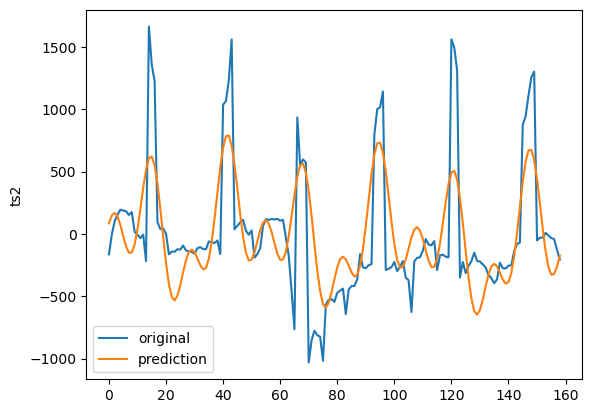

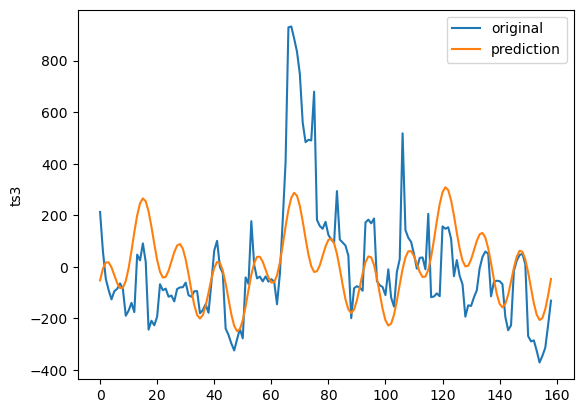

In [12]:
for column in y_train_seasonal.columns:
    plt.figure()
    sns.lineplot(y_train_seasonal[column], label = 'original')
    sns.lineplot(y_pred_seasonal[column], label = 'prediction')

# Validation Error
The below code creates a csv file with predictions on the test dataset

In [138]:
dftest = pd.read_csv('playground-series-s3e20/test.csv')
dftest = dftest.loc[:, ['ID_LAT_LON_YEAR_WEEK','latitude', 'longitude', 'week_no']]

emission_forecasts = []
for _, values in dftest.iterrows():
    idx = (2022, values[3])
    col = (values[1], values[2])
    emission_forecasts.append(dfts_forecasts.loc[idx, col])

sub_file = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': dftest['ID_LAT_LON_YEAR_WEEK'],
                         'emission': emission_forecasts})

In [141]:
sub_file.to_csv('submission.csv', index=False)

In [137]:
dftest.shape[0]

24353

In [21]:
"""
def prepare_forecast_dataset(timeseries, forecast_horizon, lag_features, lead_time=0):
    x = pd.concat({f'step_{steps}':timeseries.shift(steps + lead_time)
                   for steps in range(1,lag_features)}, 
                  axis=1)
    y = pd.concat({f'step_{steps}':timeseries.shift(-steps)
                   for steps in range(0,forecast_horizon-1)}, 
                  axis=1)
    return x, y 
"""

"\ndef prepare_forecast_dataset(timeseries, forecast_horizon, lag_features, lead_time=0):\n    x = pd.concat({f'step_{steps}':timeseries.shift(steps + lead_time)\n                   for steps in range(1,lag_features)}, \n                  axis=1)\n    y = pd.concat({f'step_{steps}':timeseries.shift(-steps)\n                   for steps in range(0,forecast_horizon-1)}, \n                  axis=1)\n    return x, y \n"